## Bulk functional analysis for Control = 10mix and perturbation = 11mix

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)

### Import libraries

In [2]:
import decoupler as dc

# Only needed for visualization:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
#import scanpy_helpers as sh
import seaborn as sns
from itertools import zip_longest
from anndata import AnnData
from matplotlib import collections  as mc

### Log TPM

In [3]:
# Log TPM
tpm = "/data/projects/2021/MicrobialMetabolites/bacterial-supernatant/10_rnaseq_pipeline/star_salmon/salmon.merged.gene_tpm.tsv"

tpm = pd.read_csv(tpm, sep="\t")

In [4]:
tpm

,gene_id,gene_name,mHCO3_10mix,mHCO3_11mix,mHCO3_ctrl,mHCO4_10mix,mHCO4_11mix,mHCO4_ctrl,mHCO5_10mix,mHCO5_11mix,mHCO5_ctrl,mHCO6_10mix,mHCO6_11mix,mHCO6_ctrl,mHCO7_10mix,mHCO7_11mix,mHCO7_ctrl,mHCO8_10mix,mHCO8_11mix,mHCO8_ctrl
0,ENSMUSG00000000001.5,Gnai3,32.373041,37.384390,32.373041,35.661660,46.371973,38.169797,37.908312,71.220471,48.530228,99.322202,58.695875,75.076888,50.372422,65.203292,53.272346,57.007018,89.545246,71.021326
1,ENSMUSG00000000003.16,Pbsn,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,ENSMUSG00000000028.16,Cdc45,0.253707,0.384086,0.253707,0.622006,0.291910,0.041354,0.169802,0.048383,0.083100,0.091481,0.358047,0.320414,0.141156,0.043382,0.468362,0.060485,0.191787,0.232603
3,ENSMUSG00000000031.17,H19,0.000000,0.000000,0.000000,0.155501,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.143219,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ENSMUSG00000000037.18,Scml2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.042451,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.155068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55411,ENSMUSG00002076988.1,5S_rRNA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
55412,ENSMUSG00002076989.1,U1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
55413,ENSMUSG00002076990.1,ENSMUSG00002076990,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
55414,ENSMUSG00002076991.1,7SK,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [5]:
# Log TPM
deg = "/data/projects/2021/MicrobialMetabolites/bacterial-supernatant/20_deseq2icbi/paired_grp/deseq2_11mix_vs_10mix/11mix_10mix_IHWallGenes.tsv"
deg = pd.read_csv(deg, sep="\t")



In [6]:
deg

,gene_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,weight,gene_name,genes_description,gene_type
0,ENSMUSG00000029380,85.134297,2.521943,0.403477,6.250517,4.090967e-10,0.000006,0.720150,Cxcl1,chemokine (C-X-C motif) ligand 1,protein_coding
1,ENSMUSG00000029371,579.648559,1.818758,0.299308,6.076551,1.227951e-09,0.000009,0.662011,Cxcl5,chemokine (C-X-C motif) ligand 5,protein_coding
2,ENSMUSG00000037411,616.433710,2.300829,0.380521,6.046529,1.479992e-09,0.000006,2.073552,Serpine1,"serine (or cysteine) peptidase inhibitor, clad...",protein_coding
3,ENSMUSG00000029672,2517.818565,0.625780,0.105101,5.954088,2.615255e-09,0.000006,3.000000,Fam3c,FAM3 metabolism regulating signaling molecule C,protein_coding
4,ENSMUSG00000026811,2593.827269,-1.206002,0.216184,-5.578587,2.424797e-08,0.000034,2.726486,St6galnac6,"ST6 (alpha-N-acetyl-neuraminyl-2,3-beta-galact...",protein_coding
...,...,...,...,...,...,...,...,...,...,...,...
19042,ENSMUSG00000049761,0.588310,-0.000472,3.051139,-0.000155,9.998767e-01,1.000000,0.000000,Pmis2,PMIS2 transmembrane protein,protein_coding
19043,ENSMUSG00000060808,0.588310,-0.000472,3.051139,-0.000155,9.998767e-01,1.000000,0.000000,B9d1os,NaN,lncRNA
19044,ENSMUSG00000102550,2.628602,0.000174,1.158266,0.000150,9.998804e-01,1.000000,0.000000,Gm8276,"poly(A) binding protein, cytoplasmic 1 pseudogene",processed_pseudogene
19045,ENSMUSG00000105179,0.945309,-0.000418,3.046062,-0.000137,9.998904e-01,1.000000,0.000000,Gm42866,NaN,TEC


In [7]:
deg = deg[deg["padj"]<0.5]

In [8]:
deg.sort_values("padj").head(300)

,gene_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,weight,gene_name,genes_description,gene_type
0,ENSMUSG00000029380,85.134297,2.521943,0.403477,6.250517,4.090967e-10,0.000006,0.720150,Cxcl1,chemokine (C-X-C motif) ligand 1,protein_coding
2,ENSMUSG00000037411,616.433710,2.300829,0.380521,6.046529,1.479992e-09,0.000006,2.073552,Serpine1,"serine (or cysteine) peptidase inhibitor, clad...",protein_coding
3,ENSMUSG00000029672,2517.818565,0.625780,0.105101,5.954088,2.615255e-09,0.000006,3.000000,Fam3c,FAM3 metabolism regulating signaling molecule C,protein_coding
1,ENSMUSG00000029371,579.648559,1.818758,0.299308,6.076551,1.227951e-09,0.000009,0.662011,Cxcl5,chemokine (C-X-C motif) ligand 5,protein_coding
4,ENSMUSG00000026811,2593.827269,-1.206002,0.216184,-5.578587,2.424797e-08,0.000034,2.726486,St6galnac6,"ST6 (alpha-N-acetyl-neuraminyl-2,3-beta-galact...",protein_coding
5,ENSMUSG00000019997,1523.481851,1.593244,0.300975,5.293615,1.199220e-07,0.000127,3.000000,Ccn2,cellular communication network factor 2,protein_coding
6,ENSMUSG00000033735,2422.611717,-0.720278,0.137230,-5.248694,1.531810e-07,0.000139,3.000000,Spr,sepiapterin reductase,protein_coding
8,ENSMUSG00000018287,4200.420363,-0.583453,0.118368,-4.929134,8.259512e-07,0.000655,3.000000,Spag7,sperm associated antigen 7,protein_coding
13,ENSMUSG00000015647,2890.271495,0.568758,0.119952,4.741552,2.120874e-06,0.001192,3.000000,Lama5,"laminin, alpha 5",protein_coding
12,ENSMUSG00000090264,1797.236376,-14.144542,2.979685,-4.746993,2.064629e-06,0.001192,3.000000,Eif4ebp3,eukaryotic translation initiation factor 4E bi...,protein_coding


In [9]:
deg.iloc[0]["padj"]

5.534751259949784e-06

In [10]:
array = ["ENSMUSG00000029371.8",#Cxcl5
"ENSMUSG00000026822.15",
"ENSMUSG00000029380.12",#Cxcl1
"ENSMUSG00000031775.6",
"ENSMUSG00000056293.13",
"ENSMUSG00000058427.11", #Cxcl2
"ENSMUSG00000021403.4",
"ENSMUSG00000000627.16",
"ENSMUSG00000018554.14",
"ENSMUSG00000018774.14",
"ENSMUSG00000055748.13",
"ENSMUSG00000026463.18",
"ENSMUSG00000026811.19",
"ENSMUSG00000048992.10",
"ENSMUSG00000028039.12",
"ENSMUSG00000033735.10",
"ENSMUSG00000090264.2",
"ENSMUSG00000106300.2",
"ENSMUSG00000037033.10",
"ENSMUSG00000004665.11",
"ENSMUSG00000026822.15", #Lcn2
"ENSMUSG00000024401.15", #Tnf
"ENSMUSG00000026166.15"] #Ccl20

In [11]:
array[22]

'ENSMUSG00000026166.15'

/tmp/ipykernel_61229/4212573755.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tpm_1["sample"][i]= tpm_1["sample_conditions"][i][0]
/tmp/ipykernel_61229/4212573755.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tpm_1["condition"][i]= tpm_1["sample_conditions"][i][1]


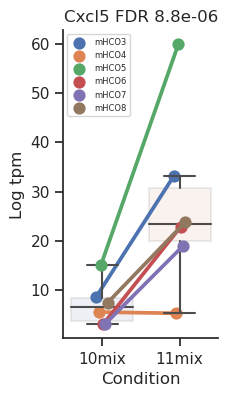

In [14]:


tpm_1 = tpm[tpm["gene_id"]==array[0]]
tpm_1 = tpm_1.iloc[:,2:]
tpm_1 = tpm_1.T
tpm_1 = tpm_1.reset_index()
tpm_1["sample_conditions"]= tpm_1["index"].str.split("_", n = 1, expand = False)
tpm_1["sample"] = 0 
tpm_1["condition"] = 0 
for i in range(len(tpm_1)):
    tpm_1["sample"][i]= tpm_1["sample_conditions"][i][0]
    tpm_1["condition"][i]= tpm_1["sample_conditions"][i][1]
    
tpm_1 = tpm_1.drop("sample_conditions", axis = 1)
tpm_1 = tpm_1.drop("index", axis = 1)
tpm_1 = tpm_1[tpm_1["condition"].str.contains("ctrl") == False]
#tpm_1 = tpm_1[tpm_1["sample"].str.contains("mHCO4") == False]

sns.set(rc={'figure.figsize':(2,4)})
sns.set(font_scale=0.9)
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
#sns.set_style("whitegrid")
sns.set_theme(style="ticks", rc=custom_params)

plt.title(str(deg.iloc[1]["gene_name"]) + " FDR " + str(round(deg.iloc[1]["padj"],7)))
sns.pointplot(data=tpm_1, x="condition", y=tpm_1.columns[0], hue = "sample",dodge=True, scale = 1)
sns.boxplot(data=tpm_1, x="condition",  y=tpm_1.columns[0], dodge=True, boxprops=dict(alpha=.1))
#define seaborn background colors

plt.xlabel("Condition")
plt.ylabel("Log tpm")
plt.legend(fontsize='6')


plt.savefig('output.png', dpi=500, bbox_inches='tight')




In [ ]:


tpm_1 = tpm[tpm["gene_id"]==array[2]]
tpm_1 = tpm_1.iloc[:,2:]
tpm_1 = tpm_1.T
tpm_1 = tpm_1.reset_index()
tpm_1["sample_conditions"]= tpm_1["index"].str.split("_", n = 1, expand = False)
tpm_1["sample"] = 0 
tpm_1["condition"] = 0 
for i in range(len(tpm_1)):
    tpm_1["sample"][i]= tpm_1["sample_conditions"][i][0]
    tpm_1["condition"][i]= tpm_1["sample_conditions"][i][1]
    
tpm_1 = tpm_1.drop("sample_conditions", axis = 1)
tpm_1 = tpm_1.drop("index", axis = 1)
tpm_1 = tpm_1[tpm_1["condition"].str.contains("ctrl") == False]
#tpm_1 = tpm_1[tpm_1["sample"].str.contains("mHCO4") == False]

sns.set(rc={'figure.figsize':(2,4)})
sns.set(font_scale=0.9)
#custom_params = {"axes.spines.right": False, "axes.spines.top": False}
#sns.set_style("whitegrid")
sns.set_theme(style="ticks", rc=custom_params)

plt.title(str(deg.iloc[0]["gene_name"]) + " FDR " + str(round(deg.iloc[0]["padj"],5)))
sns.pointplot(data=tpm_1, x="condition", y=tpm_1.columns[0], hue = "sample",dodge=True, scale = 1)
sns.boxplot(data=tpm_1, x="condition",  y=tpm_1.columns[0], dodge=True, boxprops=dict(alpha=.1))
#define seaborn background colors

plt.xlabel("Condition")
plt.ylabel("Log tpm")
plt.legend(fontsize='6')


plt.savefig('output.png', dpi=500, bbox_inches='tight')




In [ ]:


tpm_1 = tpm[tpm["gene_id"]==array[20]]
tpm_1 = tpm_1.iloc[:,2:]
tpm_1 = tpm_1.T
tpm_1 = tpm_1.reset_index()
tpm_1["sample_conditions"]= tpm_1["index"].str.split("_", n = 1, expand = False)
tpm_1["sample"] = 0 
tpm_1["condition"] = 0 
for i in range(len(tpm_1)):
    tpm_1["sample"][i]= tpm_1["sample_conditions"][i][0]
    tpm_1["condition"][i]= tpm_1["sample_conditions"][i][1]
    
tpm_1 = tpm_1.drop("sample_conditions", axis = 1)
tpm_1 = tpm_1.drop("index", axis = 1)
tpm_1 = tpm_1[tpm_1["condition"].str.contains("ctrl") == False]
#tpm_1 = tpm_1[tpm_1["sample"].str.contains("mHCO4") == False]

sns.set(rc={'figure.figsize':(2,4)})
sns.set(font_scale=0.9)
#custom_params = {"axes.spines.right": False, "axes.spines.top": False}
#sns.set_style("whitegrid")
sns.set_theme(style="ticks", rc=custom_params)

plt.title(str(deg.iloc[131]["gene_name"]) + " FDR " + str(round(deg.iloc[131]["padj"],4)))
sns.pointplot(data=tpm_1, x="condition", y=tpm_1.columns[0], hue = "sample",dodge=True, scale = 1)
sns.boxplot(data=tpm_1, x="condition",  y=tpm_1.columns[0], dodge=True, boxprops=dict(alpha=.1))
#define seaborn background colors

plt.xlabel("Condition")
plt.ylabel("Log tpm")
plt.legend(fontsize='6')


plt.savefig('output.png', dpi=500, bbox_inches='tight')




In [ ]:


tpm_1 = tpm[tpm["gene_id"]==array[21]]
tpm_1 = tpm_1.iloc[:,2:]
tpm_1 = tpm_1.T
tpm_1 = tpm_1.reset_index()
tpm_1["sample_conditions"]= tpm_1["index"].str.split("_", n = 1, expand = False)
tpm_1["sample"] = 0 
tpm_1["condition"] = 0 
for i in range(len(tpm_1)):
    tpm_1["sample"][i]= tpm_1["sample_conditions"][i][0]
    tpm_1["condition"][i]= tpm_1["sample_conditions"][i][1]
    
tpm_1 = tpm_1.drop("sample_conditions", axis = 1)
tpm_1 = tpm_1.drop("index", axis = 1)
tpm_1 = tpm_1[tpm_1["condition"].str.contains("ctrl") == False]
#tpm_1 = tpm_1[tpm_1["sample"].str.contains("mHCO4") == False]

sns.set(rc={'figure.figsize':(2,4)})
sns.set(font_scale=0.9)
#custom_params = {"axes.spines.right": False, "axes.spines.top": False}
#sns.set_style("whitegrid")
sns.set_theme(style="ticks", rc=custom_params)

plt.title(str(deg.iloc[70]["gene_name"]) + " FDR " + str(round(deg.iloc[70]["padj"],4)))
sns.pointplot(data=tpm_1, x="condition", y=tpm_1.columns[0], hue = "sample",dodge=True, scale = 1)
sns.boxplot(data=tpm_1, x="condition",  y=tpm_1.columns[0], dodge=True, boxprops=dict(alpha=.1))
#define seaborn background colors

plt.xlabel("Condition")
plt.ylabel("Log tpm")
plt.legend(fontsize='6')


plt.savefig('output.png', dpi=500, bbox_inches='tight')




In [ ]:


tpm_1 = tpm[tpm["gene_id"]==array[22]]
tpm_1 = tpm_1.iloc[:,2:]
tpm_1 = tpm_1.T
tpm_1 = tpm_1.reset_index()
tpm_1["sample_conditions"]= tpm_1["index"].str.split("_", n = 1, expand = False)
tpm_1["sample"] = 0 
tpm_1["condition"] = 0 
for i in range(len(tpm_1)):
    tpm_1["sample"][i]= tpm_1["sample_conditions"][i][0]
    tpm_1["condition"][i]= tpm_1["sample_conditions"][i][1]
    
tpm_1 = tpm_1.drop("sample_conditions", axis = 1)
tpm_1 = tpm_1.drop("index", axis = 1)
tpm_1 = tpm_1[tpm_1["condition"].str.contains("ctrl") == False]
#tpm_1 = tpm_1[tpm_1["sample"].str.contains("mHCO4") == False]

sns.set(rc={'figure.figsize':(2,4)})
sns.set(font_scale=0.9)
#custom_params = {"axes.spines.right": False, "axes.spines.top": False}
#sns.set_style("whitegrid")
sns.set_theme(style="ticks", rc=custom_params)

plt.title(str(deg.iloc[61]["gene_name"]) + " FDR " + str(round(deg.iloc[61]["padj"],4)))
sns.pointplot(data=tpm_1, x="condition", y=tpm_1.columns[0], hue = "sample",dodge=True, scale = 1)
sns.boxplot(data=tpm_1, x="condition",  y=tpm_1.columns[0], dodge=True, boxprops=dict(alpha=.1))
#define seaborn background colors

plt.xlabel("Condition")
plt.ylabel("Log tpm")
plt.legend(fontsize='6')


plt.savefig('output.png', dpi=500, bbox_inches='tight')


